<a href="https://colab.research.google.com/github/brancatellimat/speech-emotion-recognition/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


import os
import sys
import math

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import librosa.feature as libf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, minmax_scale, scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

from scipy.stats import kurtosis
from scipy.stats import skew

eps = sys.float_info.epsilon

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### K-Means Clustering

In [2]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio Pattern Recognition/Project_Brancatelli/features.csv')
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.214355,0.319824,0.429688,0.423340,0.421875,0.436035,0.427734,0.434570,0.426758,0.397949,...,-21.660831,-8.824115,7.443534,5.859727,-0.321161,-15.598403,-11.630619,-11.754715,4.756393,angry
1,0.253906,0.388184,0.514648,0.510254,0.506836,0.495117,0.493164,0.479492,0.486816,0.495117,...,-20.565357,-6.349044,8.264988,5.284755,0.973508,-13.907689,-12.484719,-9.336018,3.070137,angry
2,0.218750,0.323730,0.421387,0.418945,0.411133,0.416016,0.416992,0.416504,0.404785,0.382324,...,-11.227339,-2.053445,11.747261,7.627929,-12.674572,-24.245716,-4.193148,3.420844,23.195007,angry
3,0.249512,0.368164,0.495117,0.497559,0.496094,0.491211,0.495605,0.499512,0.498047,0.508301,...,-11.301952,1.284632,9.955471,6.450918,-15.117396,-19.702325,-4.617732,2.827433,19.260487,angry
4,0.312500,0.495605,0.720215,0.666016,0.688477,0.586914,0.575684,0.666992,0.578125,0.670410,...,-0.363573,-0.588626,-0.576606,-0.317693,0.132963,0.652741,1.079558,1.260494,1.101743,disgust


In [3]:
X = features.iloc[:, :-1]
Y = features['Emotions']

cols = X.columns
cols

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2366', '2367', '2368', '2369', '2370', '2371', '2372', '2373', '2374',
       '2375'],
      dtype='object', length=2376)

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=cols)
X = X.fillna(0)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
0,1.869639,1.896799,1.960205,1.943693,1.955183,2.069038,2.019665,2.070624,2.014015,1.808955,...,-0.273780,-3.715747,-1.570938,1.535924,1.175829,0.399809,-2.820488,-1.645081,-2.119956,1.287253
1,2.389501,2.509210,2.543125,2.546454,2.550139,2.484940,2.481461,2.387912,2.438038,2.494573,...,-0.206682,-3.518538,-1.131126,1.669698,1.070563,0.604534,-2.497144,-1.798488,-1.648792,0.956889
2,1.927401,1.931794,1.903254,1.913217,1.879958,1.928112,1.943848,1.943018,1.858885,1.698705,...,0.161015,-1.837491,-0.367813,2.236785,1.499552,-1.553630,-4.474264,-0.309220,0.836258,4.899673
3,2.331739,2.329861,2.409120,2.458410,2.474914,2.457442,2.498692,2.529312,2.517327,2.587596,...,-0.333874,-1.850923,0.225352,1.944992,1.284064,-1.939913,-3.605352,-0.385480,0.720661,4.128838
4,3.159669,3.471569,3.953522,3.626683,3.822114,3.131136,3.063875,3.712245,3.082692,3.731440,...,0.092038,0.118224,-0.107519,0.229847,0.044863,0.471619,0.287499,0.637824,0.415420,0.571249


In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33992 entries, 0 to 33991
Columns: 2376 entries, 0 to 2375
dtypes: float64(2376)
memory usage: 616.2 MB


In [7]:
X.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2371    0
2372    0
2373    0
2374    0
2375    0
Length: 2376, dtype: int64

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [9]:
principal_Df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principal_Df.head()

,principal component 1,principal component 2
0,-3.677541,6.637896
1,-0.679121,4.132345
2,-1.888704,7.623524
3,-0.663541,6.083375
4,-20.908993,8.443870


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

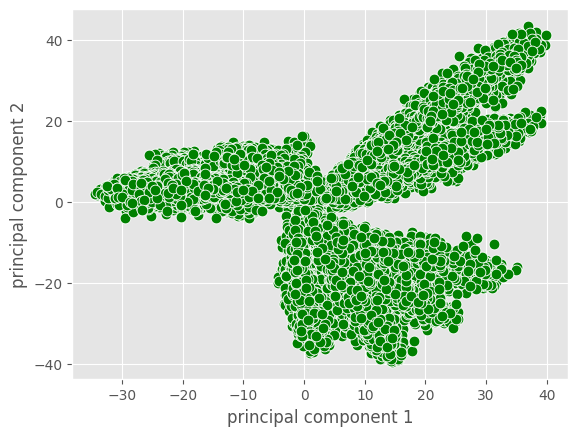

In [10]:
sns.scatterplot(x='principal component 1', y='principal component 2',
                data=principal_Df, s=60, color='green')


In [11]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(principal_Df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [12]:
centroids = model.cluster_centers_
centroids

array([[ -7.80837796,   5.36989719],
       [ 26.25104151,  23.72391955],
       [  3.05324187, -12.62171073],
       [ 14.58093682,   8.99788346],
       [-21.33015099,   4.61717121],
       [ 11.37094818, -23.59939448]])

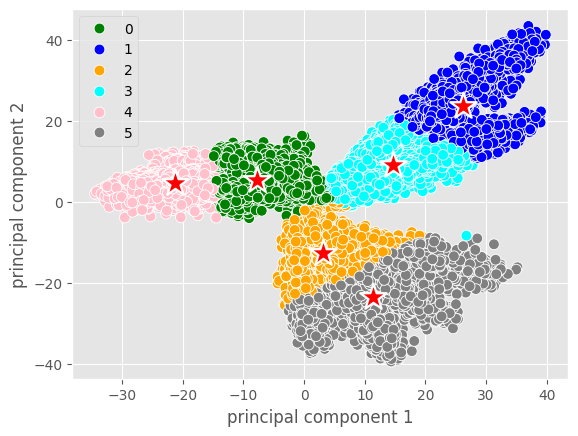

In [13]:
sns.scatterplot(x='principal component 1', y='principal component 2', data=principal_Df,
                s=60, hue=model.labels_, palette=['green', 'blue', 'orange', 'cyan', 'pink', 'gray'])

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*',
                s=400, color='red')

plt.savefig('clustering.png', dpi=100)